# Demographics of Barcelona

In [1]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom

In [2]:
%run data.ipynb

### Spain

In [3]:
population_spain = population_spain.query('GEO == "Spain"')
population_spain.head()

,TIME,GEO,AGE,Value
4,2010,Spain,Total,46486619.0
5,2010,Spain,Less than 15 years,6933793.0
6,2010,Spain,From 15 to 64 years,31742426.0
7,2010,Spain,65 years or over,7810400.0
12,2011,Spain,Total,46667174.0


In [4]:
renaming = {'Total': 'Total', 'Less than 15 years': '< 15 years', 
            'From 15 to 64 years': '15-64 years', '65 years or over': '65 years and more'}

In [5]:
for i in population_spain.AGE.unique():
    population_spain['AGE'].replace(i, renaming[i], inplace=True)

In [6]:
population_spain.head()

,TIME,GEO,AGE,Value
4,2010,Spain,Total,46486619.0
5,2010,Spain,< 15 years,6933793.0
6,2010,Spain,15-64 years,31742426.0
7,2010,Spain,65 years and more,7810400.0
12,2011,Spain,Total,46667174.0


In [7]:
population_change_spain = []
age_groups = ['< 15 years', '15-64 years', '65 years and more']
for i in age_groups:
    n2019 = population_spain.query('AGE == @i').query('TIME == 2019')['Value'].values[0]
    n2010 = population_spain.query('AGE == @i').query('TIME == 2010')['Value'].values[0]
    x = (n2019-n2010)/n2010 * 100
    population_change_spain.append(x.round(2))

In [8]:
population_change_spain = pd.DataFrame({'Geo': 'Spain', 'Age_groups': age_groups, 'Percentage_change': population_change_spain})
population_change_spain

,Geo,Age_groups,Percentage_change
0,Spain,< 15 years,-0.05
1,Spain,15-64 years,-2.65
2,Spain,65 years and more,16.58


In [9]:
# population_change_eu = []
# age_groups = ['< 15 years', '15-64 years', '65 years and more']
# for i in age_groups:
#     n2019 = population_spain.query('GEO == "European Union - 28 countries (2013-2020)"').query('AGE == @i').query('TIME == 2019')['Value'].values[0]
#     n2010 = population_spain.query('GEO == "European Union - 28 countries (2013-2020)"').query('AGE == @i').query('TIME == 2010')['Value'].values[0]
#     x = (n2019-n2010)/n2010 * 100
#     population_change_eu.append(x.round(2))

In [10]:
# population_change_eu = pd.DataFrame({'Geo': 'EU', 'Age_groups': age_groups, 'Percentage_change': population_change_eu})
# population_change_eu

In [11]:
population_share_spain = []
age_groups = []
years = []
for year in range(2010,2020):
    for i in ['< 15 years', '15-64 years', '65 years and more']:
        years.append(year)
        age_groups.append(i)
        group = population_spain.query('AGE == @i').query('TIME == @year')['Value'].values[0]
        pop = population_spain.query('AGE == "Total"').query('TIME == @year')['Value'].values[0]
        x = group/pop * 100
        population_share_spain.append(x.round(2))

In [12]:
population_share_spain = pd.DataFrame({'Geo': 'Spain', 'Year': years, 'Age_group': age_groups, 'Value': population_share_spain})

In [13]:
# population_share_eu = []
# age_groups = []
# years = []
# for year in range(2010,2020):
#     for i in ['< 15 years', '15-64 years', '65 years and more']:
#         years.append(year)
#         age_groups.append(i)
#         group = population_spain.query('GEO == "European Union - 28 countries (2013-2020)"').query('AGE == @i').query('TIME == @year')['Value'].values[0]
#         pop = population_spain.query('GEO == "European Union - 28 countries (2013-2020)"').query('AGE == "Total"').query('TIME == @year')['Value'].values[0]
#         x = group/pop * 100
#         population_share_eu.append(x.round(2))

In [14]:
# population_share_eu = pd.DataFrame({'Geo': 'EU', 'Year': years, 'Age_group': age_groups, 'Value': population_share_eu})

### Catalonia

In [15]:
population_cat.head()

,TIME,GEO,AGE,Value
0,2010,Catalonia,< 15 years,1146.787
1,2010,Catalonia,15-64 years,5083.988
2,2010,Catalonia,65 years and more,1231.269
3,2019,Catalonia,< 15 years,1183.217
4,2019,Catalonia,15-64 years,4997.309


In [16]:
population_change_cat = []
age_groups = ['< 15 years', '15-64 years', '65 years and more']
for i in age_groups:
    n2019 = population_cat.query('AGE == @i').query('TIME == 2019')['Value'].values[0]
    n2010 = population_cat.query('AGE == @i').query('TIME == 2010')['Value'].values[0]
    x = (n2019-n2010)/n2010 * 100
    population_change_cat.append(x.round(2))

In [17]:
population_change_cat = pd.DataFrame({'Geo': 'Catalonia', 'Age_groups': age_groups, 'Percentage_change': population_change_cat})
population_change_cat

,Geo,Age_groups,Percentage_change
0,Catalonia,< 15 years,3.18
1,Catalonia,15-64 years,-1.70
2,Catalonia,65 years and more,16.87


In [18]:
population_share_cat = []
age_groups = []
years = []
for year in range(2010,2020):
    for i in ['< 15 years', '15-64 years', '65 years and more']:
        years.append(year)
        age_groups.append(i)
        group = population_cat.query('AGE == @i').query('TIME == @year')['Value'].values[0]
        pop = population_cat.query('TIME == @year')['Value'].sum()
        x = group/pop * 100
        population_share_cat.append(x.round(2))

In [19]:
population_share_cat = pd.DataFrame({'Geo': 'Catalonia', 'Year': years, 'Age_group': age_groups, 'Value': population_share_cat})
population_share_cat.head()

,Geo,Year,Age_group,Value
0,Catalonia,2010,< 15 years,15.37
1,Catalonia,2010,15-64 years,68.13
2,Catalonia,2010,65 years and more,16.50
3,Catalonia,2011,< 15 years,15.59
4,Catalonia,2011,15-64 years,67.62


### Barcelona

In [20]:
population_groups = pd.DataFrame(population.groupby(['Year', 'Age_group'])['Number'].sum()).reset_index()

In [21]:
population_change = []
age_groups = ['< 15 years', '15-64 years', '65 years and more']
for i in age_groups:
    n2019 = population_groups.query('Age_group == @i').query('Year == 2019')['Number'].values[0]
    n2010 = population_groups.query('Age_group == @i').query('Year == 2010')['Number'].values[0]
    x = (n2019-n2010)/n2010 * 100
    population_change.append(x.round(2))

In [23]:
population_change_df = pd.DataFrame({'Geo': 'Barcelona', 'Age_groups': age_groups, 'Percentage_change': population_change})
population_change_df = population_change_df.append(population_change_spain).append(population_change_cat)

# Visualizations

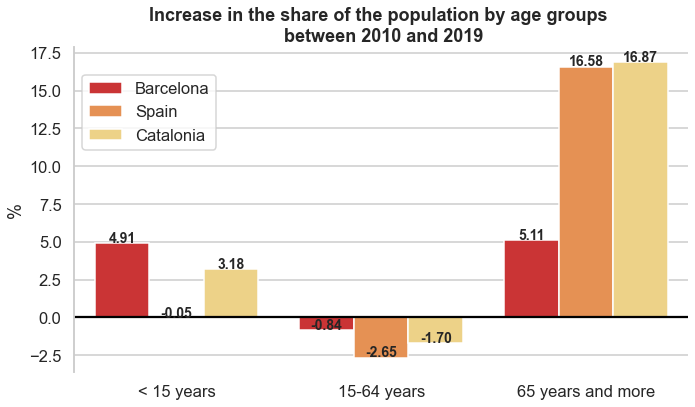

In [24]:
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10,6))

palette = dict(zip(population_change_df.Geo.unique(),
                   sns.color_palette("YlOrRd_r", 3)))

rects1 = sns.barplot(population_change_df['Age_groups'], population_change_df['Percentage_change'], 
                     hue= population_change_df['Geo'],
                     ax=ax, palette=palette)
ax.axhline(color="black")

for p in rects1.patches:
    rects1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', 
                    size=14, weight="bold")

ax.set_title('Increase in the share of the population by age groups \n between 2010 and 2019', weight="bold", size=18)
ax.set_xlabel('')
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(0, 0.8), ncol=1)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

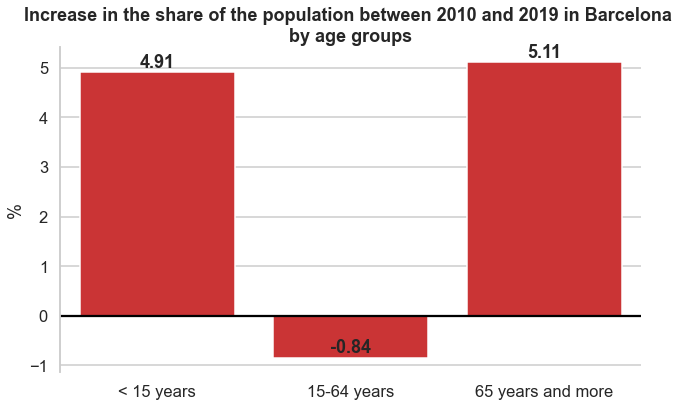

In [25]:
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10,6))

palette = dict(zip(population_change_df.Geo.unique(),
                   sns.color_palette("YlOrRd_r", 3)))

rects1 = sns.barplot(population_change_df.query('Geo == "Barcelona"')['Age_groups'], 
                     population_change_df.query('Geo == "Barcelona"')['Percentage_change'], 
                     ax=ax, color=palette["Barcelona"])
ax.axhline(color="black")

for p in rects1.patches:
    rects1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', 
                    size=18, weight="bold")

ax.set_title('Increase in the share of the population between 2010 and 2019 in Barcelona \n by age groups ', 
             weight="bold", size=18)
ax.set_xlabel('')
ax.set_ylabel('%')

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [26]:
population_share = []
years = range(2010,2020,1)
for i in years:
    seniors = population_groups.query('Age_group == "65 years and more"').query('Year == @i')['Number'].values[0]
    pop = population_groups.query('Year == @i')['Number'].sum()
    x = seniors/pop * 100
    population_share.append(x.round(2))

In [27]:
population_share_df = pd.DataFrame({'Year': years, 'Percentage_share': population_share})

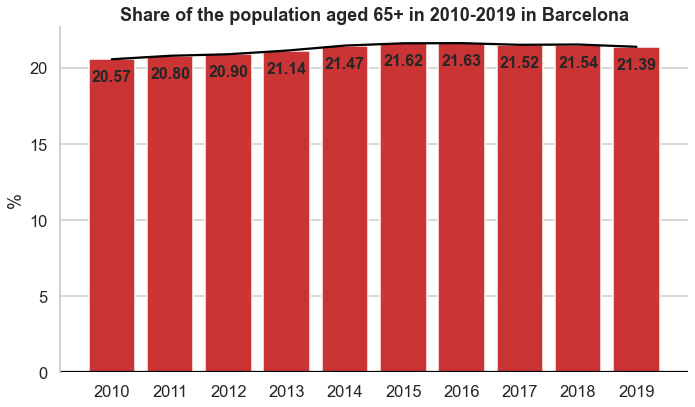

In [28]:
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10,6))

palette = dict(zip(population_change_df.Geo.unique(),
                   sns.color_palette("YlOrRd_r", 3)))

rects1 = sns.barplot(population_share_df['Year'], population_share_df['Percentage_share'], 
                     ax=ax, color=palette["Barcelona"])
ax.axhline(color="black")
sns.lineplot(x=np.arange(0,len(population_share_df)), y=population_share_df['Percentage_share'], 
            ax=ax, color="black")

for p in rects1.patches:
    rects1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, -18), textcoords = 'offset points', 
                    size=16, weight="bold")

ax.set_title('Share of the population aged 65+ in 2010-2019 in Barcelona', weight="bold", size=18)
ax.set_xlabel('')
ax.set_ylabel('%')

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [29]:
population_share2 = []
age_groups = []
years = []
for year in range(2010,2020):
    for i in ['< 15 years', '15-64 years', '65 years and more']:
        years.append(year)
        age_groups.append(i)
        group = population_groups.query('Age_group == @i').query('Year == @year')['Number'].values[0]
        pop = population_groups.query('Year == @year')['Number'].sum()
        x = group/pop * 100
        population_share2.append(x.round(2))

In [30]:
population_share2_df = pd.DataFrame({'Geo': 'Barcelona', 'Year': years, 'Age_group': age_groups, 'Value': population_share2})

In [31]:
population_share2_df

,Geo,Year,Age_group,Value
0,Barcelona,2010,< 15 years,12.05
1,Barcelona,2010,15-64 years,67.38
2,Barcelona,2010,65 years and more,20.57
3,Barcelona,2011,< 15 years,12.20
4,Barcelona,2011,15-64 years,67.00
5,Barcelona,2011,65 years and more,20.80
6,Barcelona,2012,< 15 years,12.30
7,Barcelona,2012,15-64 years,66.80
8,Barcelona,2012,65 years and more,20.90
9,Barcelona,2013,< 15 years,12.36


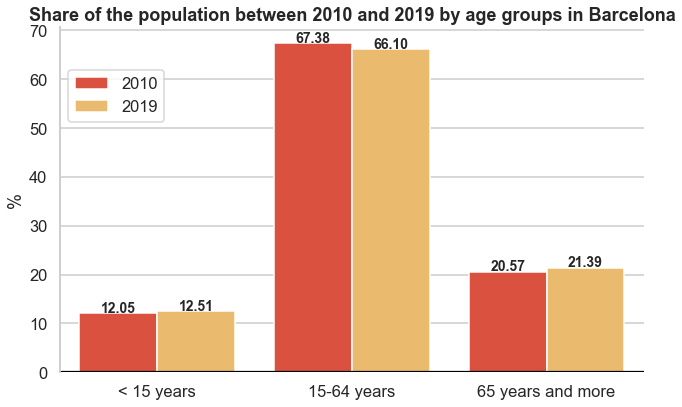

In [32]:
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10,6))

df = population_share2_df.query('Year == 2010 or Year == 2019')


palette = dict(zip(df.Year.unique(),
                   sns.color_palette("YlOrRd_r", 2)))

rects1 = sns.barplot(df['Age_group'], df['Value'], 
                     hue= df['Year'],
                     ax=ax, palette=palette)
ax.axhline(color="black")

for p in rects1.patches:
    rects1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', 
                    size=14, weight="bold")

ax.set_title('Share of the population between 2010 and 2019 by age groups in Barcelona', weight="bold", size=18)
ax.set_xlabel('')
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(0, 0.8), ncol=1)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [34]:
population_share2_df = population_share2_df.append(population_share_spain).append(population_share_cat)
population_share2_df

,Geo,Year,Age_group,Value
0,Barcelona,2010,< 15 years,12.05
1,Barcelona,2010,15-64 years,67.38
2,Barcelona,2010,65 years and more,20.57
3,Barcelona,2011,< 15 years,12.20
4,Barcelona,2011,15-64 years,67.00
...,...,...,...,...
25,Catalonia,2018,15-64 years,65.47
26,Catalonia,2018,65 years and more,18.79
27,Catalonia,2019,< 15 years,15.53
28,Catalonia,2019,15-64 years,65.59


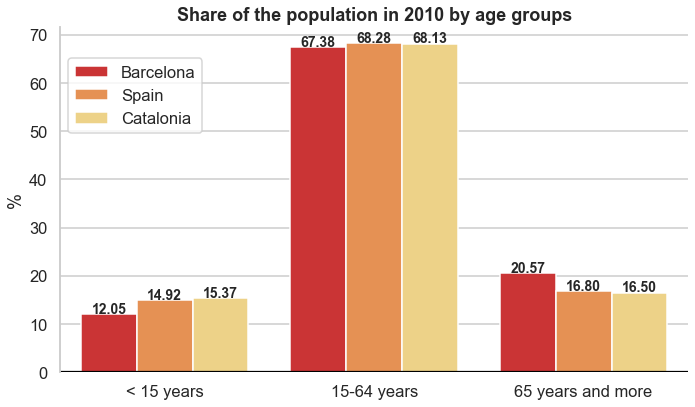

In [35]:
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10,6))

palette = dict(zip(population_share2_df.Geo.unique(),
                   sns.color_palette("YlOrRd_r", 3)))

df = population_share2_df.query('Year == 2010')

rects1 = sns.barplot(df['Age_group'],df['Value'], 
                     hue= df['Geo'],
                     ax=ax , palette=palette)
ax.axhline(color="black")

for p in rects1.patches:
    rects1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', 
                    size=14, weight="bold")

ax.set_title('Share of the population in 2010 by age groups', weight="bold", size=18)
ax.set_xlabel('')
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(0, 0.8), ncol=1)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

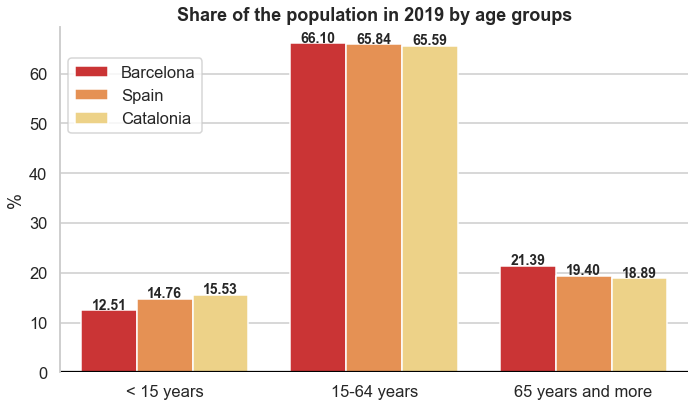

In [36]:
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10,6))

palette = dict(zip(population_share2_df.Geo.unique(),
                   sns.color_palette("YlOrRd_r", 3)))

df = population_share2_df.query('Year == 2019')

rects1 = sns.barplot(df['Age_group'],df['Value'], 
                     hue= df['Geo'],
                     ax=ax, palette=palette)
ax.axhline(color="black")

for p in rects1.patches:
    rects1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', 
                    size=14, weight="bold")

ax.set_title('Share of the population in 2019 by age groups', weight="bold", size=18)
ax.set_xlabel('')
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(0, 0.8), ncol=1)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

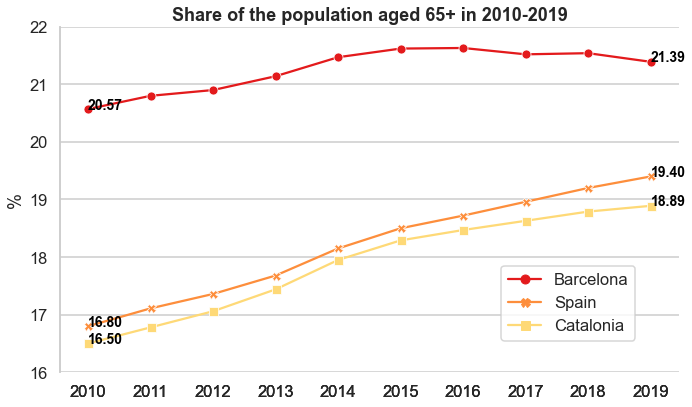

In [37]:
sns.set(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10,6))

palette = dict(zip(population_share2_df.Geo.unique(),
                   sns.color_palette("YlOrRd_r", 3)))

# Plot the lines on two facets
sns.lineplot(x="Year", y="Value",
            hue="Geo", style="Geo", markers=True, dashes=False, palette=palette,
            legend="full", data=population_share2_df.query('Age_group == "65 years and more"'), ax=ax)

for group in population_share2_df.query('Age_group == "65 years and more"').groupby('Geo'):
    for x,y,m in group[1][["Year","Value",'Value']].values:
        if x == 2010 or x == 2019:
            ax.text(x,y,f'{m:.2f}',color="black", size=14, weight="bold")
                     

ax.set_title('Share of the population aged 65+ in 2010-2019', weight="bold", size=18)
ax.set_xlabel('')
ax.set_ylabel('%')
ax.set_xticks(population_share2_df.query('Age_group == "65 years and more"')['Year'])
ax.set(ylim=(16, 22))
handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='center left', bbox_to_anchor=(0.7, 0.2), ncol=1, title=False, handles=handles[1:], labels=labels[1:])
ax.grid(axis='x', b=False)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)